In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
I = cv2.imread('MHlpW.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
I=I.astype(float)

In [3]:
#Parameters
dt = 0.1  #Time step
T = 30  #Stopping time
K = 1  #Conductivity
a=10 ## grado de filtrado 
tt=np.arange(0, T, dt)
#Initialize u=f.
If=I.copy()
m,n,ch = If.shape
u_y=I[:,:,0].copy()*0
u_x=I[:,:,0].copy()*0
u_xx=I[:,:,0].copy()*0
u_yy=I[:,:,0].copy()*0


In [4]:
for channel in range(3):
    u = I[:,:,channel].copy()
    for i in range(len(tt)):
        #derivate u[y,x] 
        u_y[:-1,:]=u[1:,:]-u[0:-1,:]
        u_x[:,:-1]=u[:,1:]-u[:,0:-1]

        ##condicion de borde padding
        u_y[m-1,n-1]=u_y[m-2,n-2]
        u_x[m-1,n-1]=u_x[m-2,n-2]
        mg=np.sqrt(u_x**2+u_y**2)
        K=np.exp(-((mg/a)**2))
        p=K*u_x
        u_xx= (np.concatenate((p[:,1:],p[:,-1].reshape(len(p[:,-1]),1)), axis=1)
        -np.concatenate((p[:,0].reshape(len(p[:,0]),1),p[:,:-1]), axis=1))

        p=K*u_y
        u_yy= (np.concatenate((p[1:,:],p[-1,:].reshape(1,len(p[-1,:]))), axis=0)-
               np.concatenate((p[0,:].reshape(1,len(p[0,:])),p[:-1,:],), axis=0))
        ##condicion de SD
        u = u +  dt * (u_xx + u_yy)
    If[:,:,channel]=u

(-0.5, 495.5, 309.5, -0.5)

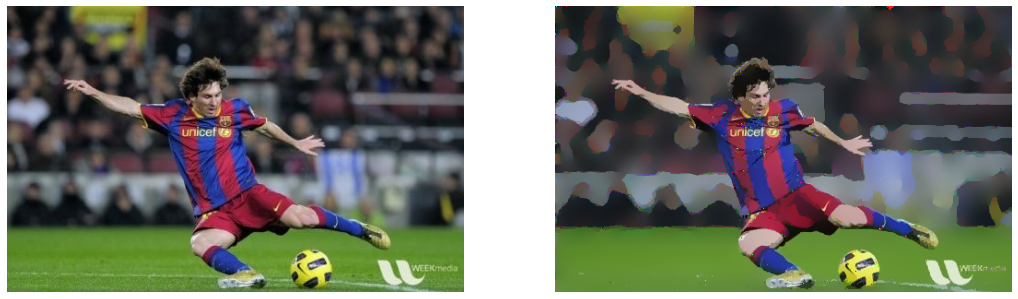

In [5]:
fig=plt.figure(figsize=(18,50))
a = fig.add_subplot(1, 2, 1)
plt.imshow(I.astype(np.uint8), cmap='gray')
plt.axis('off')
B = fig.add_subplot(1, 2, 2)
plt.imshow(If.astype(np.uint8), cmap='gray')
plt.axis('off')